# Neutron scintillator detector


In [1]:
import openmc
import openmc.deplete
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Image

import os


In [2]:

###############################################################################
#                              Define materials
###############################################################################

# Fuel gap material setting ----------
helium = openmc.Material(material_id=2, name='Helium')
helium.set_density('g/cm3', 0.001598)
helium.add_element('He', 2.4044e-4)

# Fuel cladding material setting ---------
clad = openmc.Material(material_id=3, name='Zircaloy 4')
clad.set_density('g/cm3', 6.55)
clad.add_element('Sn', 0.014  , 'wo')
clad.add_element('Fe', 0.00165, 'wo')
clad.add_element('Cr', 0.001  , 'wo')
clad.add_element('Zr', 0.98335, 'wo')

# Moderator material setting ----------
water = openmc.Material(material_id=4, name='Water')
water.set_density('g/cm3', 0.740582)
water.add_element('H', 5.0e-2)
water.add_element('O', 2.4e-2)
water.add_s_alpha_beta('c_H_in_H2O')


# Reactor shielding material
shielding = openmc.Material(material_id=8, name='Bottom plate region')
shielding.set_density('g/cm3', 7.184)
shielding.add_nuclide("H1", 0.0011505, 'wo')
shielding.add_nuclide("O16", 0.0091296, 'wo')
shielding.add_nuclide("B10", 3.70915e-6, 'wo')
shielding.add_nuclide("B11", 1.68974e-5, 'wo')
shielding.add_nuclide("Fe54", 0.03855611055, 'wo')
shielding.add_nuclide("Fe56", 0.627585036425, 'wo')
shielding.add_nuclide("Fe57", 0.014750478, 'wo')
shielding.add_nuclide("Fe58", 0.002000875025, 'wo')
shielding.add_nuclide("Ni58", 0.059855207342, 'wo')
shielding.add_nuclide("Mn55", 0.0197940, 'wo')
shielding.add_nuclide("Cr52", 0.157390026871, 'wo')
shielding.add_s_alpha_beta('c_H_in_H2O')

# Reactor pressure vessel material
steel = openmc.Material(material_id=9, name='Reactor pressure vessel steel')
steel.set_density('g/cm3', 7.9)
steel.add_nuclide("Fe54", 0.05437098, 'wo')
steel.add_nuclide("Fe56", 0.88500663, 'wo')
steel.add_nuclide("Fe57", 0.0208008, 'wo')
steel.add_nuclide("Fe58", 0.00282159, 'wo')
steel.add_nuclide("Ni58", 0.0067198, 'wo')
steel.add_nuclide("Ni60", 0.0026776, 'wo')
steel.add_nuclide("Mn55", 0.01, 'wo')
steel.add_nuclide("Cr52", 0.002092475, 'wo')
steel.add_nuclide("C0", 0.0025, 'wo')
steel.add_nuclide("Cu63", 0.0013696, 'wo')

# Reactor shielding material
scintillator = openmc.Material(material_id=11, name='Gadolinium scint')
scintillator.set_density('g/cm3', 7.184)
scintillator.add_nuclide("Gd156", 1, 'wo')


#scintillator = openmc.Material(material_id = 10, name = "Gadolinium scintillator")

In [3]:

materials_file = openmc.Materials([water,helium,steel,shielding,scintillator])

materials_file.cross_sections = "/Users/SindreKaald/nndc_hdf5/cross_sections.xml"

materials_file.export_to_xml()

# Create geometry

In [4]:
###############################################################################
#                            Make the geometry
###############################################################################

# A square lattice reactor 
# Cylindrical tank 
# Reactor pitch = 
# Number of fuel elements = 

###############################################################################
#                            Create the necessary surfaces


# Surfaces for fuel elements
fuel_surf_1 = openmc.ZCylinder(r=0.41, surface_id=1)  # Cylinder for fuel pellets
fuel_surf_2 = openmc.ZCylinder(r=0.475, surface_id=2) # Fuel gap 
fuel_surf_3 = openmc.ZCylinder(r=0.56, surface_id=3)  # Cylinder for fuel cladding, inner radius
fuel_surf_4 = openmc.ZCylinder(r=0.62, surface_id=4)  # Cylinder for fuel cladding, outer radius

# Surfaces for reactor tank and shielding
core_surf_5 = openmc.ZCylinder(r=15.0, surface_id=5) # Reactor tank inner surface
core_surf_6 = openmc.ZCylinder(r=18.0, surface_id=6)# Reactor tank outer surface
core_surf_7 = openmc.ZCylinder(r=20.0, surface_id=7, boundary_type='vacuum') 
#core_surf_8 = openmc.ZCylinder(r=149.0, surface_id=8, boundary_type='vacuum') # Cylinder for simulation universe (and boundary to zero importance region)

#core_surf_31 = openmc.ZPlane(z0=-100.0, surface_id=31, boundary_type='vacuum') # Lower outside (and boundary to zero importance region)
core_surf_32 = openmc.ZPlane(z0=-30.0, surface_id=32, boundary_type='vacuum') # Shielding lower 
core_surf_33 = openmc.ZPlane(z0=-25.0, surface_id=33) # Lower tank wall outside
core_surf_34 = openmc.ZPlane(z0=-23.0, surface_id=34) # Lower tank wall inside
core_surf_35 = openmc.ZPlane(z0=0.0, surface_id=35)   # Middle of tank
core_surf_36 = openmc.ZPlane(z0=10.0, surface_id=36)  # Upper tank wall inside
core_surf_37 = openmc.ZPlane(z0=25.0, surface_id=37)  # Upper tank wall outside
core_surf_38 = openmc.ZPlane(z0=30.0, surface_id=38, boundary_type='vacuum')  # Shielding upper
#core_surf_39 = openmc.ZPlane(z0=100.0, surface_id=39, boundary_type='vacuum') # Upper outside (and boundary to zero importance region)



xl = openmc.XPlane(x0=-1.5)
xr = openmc.XPlane(x0=1.5)
yl = openmc.YPlane(y0=-1.5)
yr = openmc.YPlane(y0=1.5)
zl = openmc.ZPlane(z0=-2.5)
zr = openmc.ZPlane(z0=-2.25)

inside_box = +xl & -xr & +yl & -yr & +zl & -zr
outside_box = ~inside_box



# Volume settings

In [5]:
###############################################################################
#                     Create the volumes and fill with material

# Define pin cells.
fuel = openmc.Universe(name='Fuel pin, cladding',
                            universe_id=1)
fuel_cell_21 = openmc.Cell(cell_id=21, fill=helium, region= - fuel_surf_1)
fuel_cell_22 = openmc.Cell(cell_id=22, fill=clad, region= + fuel_surf_1 & - fuel_surf_2)
fuel_cell_23 = openmc.Cell(cell_id=23, fill=water, region= + fuel_surf_2)
fuel.add_cells((fuel_cell_21, fuel_cell_22, fuel_cell_23))


tube_cold = openmc.Universe(name='Instrumentation guide tube, '
                            'cold water', universe_id=2)
c24 = openmc.Cell(cell_id=24, fill=water, region=-fuel_surf_3)
c25 = openmc.Cell(cell_id=25, fill=clad, region=+fuel_surf_3 & -fuel_surf_4)
c26 = openmc.Cell(cell_id=26, fill=water, region=+fuel_surf_4)
tube_cold.add_cells((c24, c25, c26))


# Define assemblies.
moderator_assembly = openmc.Universe(name='Water assembly', universe_id = 5)
c50 = openmc.Cell(cell_id=50, fill=water, region= + core_surf_34 & -core_surf_36)
moderator_assembly.add_cell(c50)

# Set positions occupied by guide tubes
tube_x = np.array([0])
tube_y = np.array([0])


#         Define the fuel assembly 
#           10 by 10 fuel pins surrounded by water moderator
#          ---------------------
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o x o o x x |
#         | o o o x o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#          ---------------------

fuel_lattice_101 = openmc.RectLattice(name="Fuel lattice, lattice_id=101")
fuel_lattice_101.lower_left = (-5, -5)
fuel_lattice_101.pitch = (1, 1)
fuel_lattice_101.universes = np.tile(fuel, (10, 10))
fuel_lattice_101.universes[tube_x, tube_y] = tube_cold

# Construct filling for the reactor core lattice 
fuel_assembly = openmc.Universe(name='Fuel assembly ', universe_id=6)
fuel_assembly_cell_60 = openmc.Cell(cell_id=60, fill = fuel_lattice_101 , region= + core_surf_34 & -core_surf_36)
fuel_assembly.add_cell(fuel_assembly_cell_60)

fa_hw = openmc.Universe(name='Water assembly', universe_id=8)
c70 = openmc.Cell(cell_id=70, fill=water, region= + core_surf_34 & -core_surf_36)
fa_hw.add_cell(c70)

core_lattice = openmc.RectLattice(name='Core lattice', lattice_id=200)
core_lattice.lower_left = (-80.0, -80.0)
core_lattice.pitch = (10, 10)
core_lattice.universes = [
    [fa_hw]*16,
    [fa_hw]*5 + [fuel_assembly]*6 + [fa_hw]*5,
    [fa_hw]*4 + [fuel_assembly]*8 + [fa_hw]*4,
    [fa_hw]*3 + [fuel_assembly]*10 + [fa_hw]*3,
    [fa_hw]*2 + [fuel_assembly]*12 + [fa_hw]*2,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*2 + [fuel_assembly]*12 + [fa_hw]*2,
    [fa_hw]*3 + [fuel_assembly]*10 + [fa_hw]*3,
    [fa_hw]*4 + [fuel_assembly]*8 + [fa_hw]*4,
    [fa_hw]*5 + [fuel_assembly]*6 + [fa_hw]*5,
    [fa_hw]*16]
 

    
    
###############################################################################
#                           Fill the simulation universe
geometry = openmc.Geometry()

# Assign cells to the universe
simulation_universe = openmc.Universe(universe_id=0, name='root universe')
c1 = openmc.Cell(cell_id=1, fill=helium,       region= - core_surf_5 & + core_surf_34 & -core_surf_36 & ~inside_box,name = "Tank")
c8 =openmc.Cell(cell_id=80, fill=scintillator,       region= inside_box ,name = "detector") 
c2 = openmc.Cell(cell_id=2, fill=helium,              region= - core_surf_6 & + core_surf_5 & + core_surf_34 & -core_surf_36)
c3 = openmc.Cell(cell_id=3, fill=helium,       region=-core_surf_7 & +core_surf_6 &  + core_surf_34 & -core_surf_36)
c4 = openmc.Cell(cell_id=4, fill=helium,          region=-core_surf_7 & +core_surf_36 & -core_surf_37)
c5 = openmc.Cell(cell_id=5, fill=helium,          region=-core_surf_7 & +core_surf_33 & -core_surf_34)
c6 = openmc.Cell(cell_id=6, fill=helium,     region=-core_surf_7 & +core_surf_37 & -core_surf_38)
c7 = openmc.Cell(cell_id=7, fill=helium,     region=-core_surf_7 & +core_surf_32 & -core_surf_33)

simulation_universe.add_cells((c1,c2,c3,c4,c5,c6,c7,c8))
geometry.root_universe = simulation_universe
geometry.export_to_xml()

# Create tallies


In [6]:
###############################################################################
#                       Make tallies for scoring values of interest
###############################################################################

# Instantiate an empty Tallies object
tallies_file = openmc.Tallies()


#######################################################
#                       xy-mesh tally
# Create mesh which will be used for tally
mesh_xy = openmc.RegularMesh(mesh_id = 1)
mesh_xy.dimension = [100, 100]
mesh_xy.lower_left = [-75, -75]
mesh_xy.upper_right = [75, 75]

# Create mesh filter for tally
mesh_filter_xy = openmc.MeshFilter(mesh_xy)
particle_filter = openmc.ParticleFilter(['neutron','photon'], filter_id=2)

# Create mesh tally to score flux and fission rate
tally_xy = openmc.Tally(name='flux_xy',tally_id = 1)
tally_xy.filters = [mesh_filter_xy,particle_filter]
tally_xy.scores = ['flux', 'fission']
tallies_file.append(tally_xy)



#######################################################
#                       xz-mesh tally
# Create mesh which will be used for tally
mesh_xz = openmc.RegularMesh(mesh_id = 2)
mesh_xz.dimension = [100,1 ,100]
mesh_xz.lower_left = [-100, -0.5,-100]
mesh_xz.upper_right = [100, 0.5,100]

# Create mesh filter for tally
mesh_filter_xz = openmc.MeshFilter(mesh_xz)

# Create mesh tally to score flux and fission rate
tally_xz = openmc.Tally(name='flux_xz',tally_id = 2)
tally_xz.filters = [mesh_filter_xz,particle_filter]
tally_xz.scores = ['flux', 'fission']
tallies_file.append(tally_xz)


#######################################################
#                       xz-mesh tally
# Create mesh which will be used for tally
mesh_xy = openmc.RegularMesh(mesh_id = 5)
mesh_xy.dimension = [100,100 ,1]
mesh_xy.lower_left = [-100, -100,-2.5,]
mesh_xy.upper_right = [100, 100,-2.25]

# Create mesh filter for tally
mesh_filter_xy = openmc.MeshFilter(mesh_xy)

# Create mesh tally to score flux and fission rate
tally_xy = openmc.Tally(name='flux_xy_Gd_detector',tally_id = 3)
tally_xy.filters = [mesh_filter_xy,particle_filter]
tally_xy.scores = ['flux', 'fission']
tallies_file.append(tally_xy)





"""
#######################################################
#                       yz-mesh tally
# Create mesh which will be used for tally
mesh_yz = openmc.RegularMesh(mesh_id = 3)
mesh_yz.dimension = [1, 200 ,200]
mesh_yz.lower_left = [-0.1,-100,-100]
mesh_yz.upper_right = [0.1,100,100]

# Create mesh filter for tally
mesh_filter_yz = openmc.MeshFilter(mesh_yz)

# Create mesh tally to score flux and fission rate
tally_yz = openmc.Tally(name='flux_yz',tally_id = 3)
tally_yz.filters = [mesh_filter_yz]
tally_yz.scores = ['flux', 'fission']
tallies_file.append(tally_yz)
"""

"\n#######################################################\n#                       yz-mesh tally\n# Create mesh which will be used for tally\nmesh_yz = openmc.RegularMesh(mesh_id = 3)\nmesh_yz.dimension = [1, 200 ,200]\nmesh_yz.lower_left = [-0.1,-100,-100]\nmesh_yz.upper_right = [0.1,100,100]\n\n# Create mesh filter for tally\nmesh_filter_yz = openmc.MeshFilter(mesh_yz)\n\n# Create mesh tally to score flux and fission rate\ntally_yz = openmc.Tally(name='flux_yz',tally_id = 3)\ntally_yz.filters = [mesh_filter_yz]\ntally_yz.scores = ['flux', 'fission']\ntallies_file.append(tally_yz)\n"

# Geometry plotting

In [7]:
###############################################################################
#                       Make some plots of the geometry
###############################################################################
plot1 = openmc.Plot()
plot1.filename = 'materials-xy'
plot1.origin = [0, 0, -1.5]
plot1.basis = 'xy'
plot1.width = [75.0, 75.0]
plot1.pixels = [3000, 3000]
plot1.color = "material"

plot2 = openmc.Plot()
plot2.filename = 'materials-xz'
plot2.origin = [0, 0, 0]
plot2.basis = 'xz'
plot2.width = [75.0, 75.0]
plot2.pixels = [1000, 1000]
plot2.color = "material"

plot3 = openmc.Plot()
plot3.filename = 'materials-yz'
plot3.origin = [0, 0, 0]
plot3.basis = 'yz'
plot3.width = [75.0, 75.0]
plot3.pixels = [3000, 3000]
plot3.color = "material"


# Instantiate a Plots collection and export to "plots.xml"
plot_file = openmc.Plots([plot1, plot2, plot3])
plot_file.export_to_xml()

#openmc.plot_geometry()

#plot1.plot_inline()

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Plot inline in jupyter or QtConsole



In [9]:
@interact(plot=['plot1','plot2','plot3'])
def plotOpenMC(plot):
    openmc.plot_inline(eval(plot))

interactive(children=(Dropdown(description='plot', options=('plot1', 'plot2', 'plot3'), value='plot1'), Output…

# Simulation settings


In [10]:
###############################################################################
#                            Set simulation settings
###############################################################################

power = 1.2e6
days = 24*60*60

timesteps = [1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days]

settings = openmc.Settings()





source = openmc.Source()
source.space = openmc.stats.Point([0,0,5])
source.angle = openmc.stats.Isotropic()
source.energy = openmc.stats.Discrete([10.0e6], [1.0])
settings.source = source

#settings.source = openmc.Source(source)
#settings.energy_mode = "multi-group"
settings.export_to_xml()


settings.batches = 100
settings.particles = 15000

settings.run_mode = "fixed source"


###############################################################################
#                            Turn on photon transport
###############################################################################
#settings.photon_transport = True

###############################################################################
#                            Make xml-files
###############################################################################

# Export to "materials.xml"
geometry.export_to_xml()
settings.photon_transport = True

settings.export_to_xml()

tallies_file.export_to_xml()




In [ ]:
#os.remove("summary.h5")
#os.remove("statepoint.4.h5")

settings.export_to_xml()
geometry.export_to_xml()
tallies_file.export_to_xml()

openmc.run(threads=4)

In [12]:
def plot_func(freq):
    #x = np.linspace(0, 2*np.pi)
    #y = np.sin(x * freq)
    #plt.plot(x, y)
    
    plot1 = openmc.Plot()
    plot1.filename = 'materials-xy'
    plot1.origin = [0, 0, freq]
    plot1.basis = 'xy'
    plot1.width = [75.0, 75.0]
    plot1.pixels = [3000, 3000]
    plot1.color = "material"

    plot2 = openmc.Plot()
    plot2.filename = 'materials-xz'
    plot2.origin = [0, 0, freq]
    plot2.basis = 'xz'
    plot2.width = [75.0, 75.0]
    plot2.pixels = [1000, 1000]
    plot2.color = "material"

    plot3 = openmc.Plot()
    plot3.filename = 'materials-yz'
    plot3.origin = [0, 0, freq]
    plot3.basis = 'yz'
    plot3.width = [75.0, 75.0]
    plot3.pixels = [3000, 3000]
    plot3.color = "material"


    # Instantiate a Plots collection and export to "plots.xml"
    plot_file = openmc.Plots([plot1, plot2, plot3])
    plot_file.export_to_xml();
    
    
    openmc.plot_inline(plot1);

interact(plot_func, freq = widgets.FloatSlider(value=0.5,
                                               min=-10,
                                               max=10.0,
                                               step=0.25));

interactive(children=(FloatSlider(value=0.5, description='freq', max=10.0, min=-10.0, step=0.25), Output()), _…

# Geometry plots

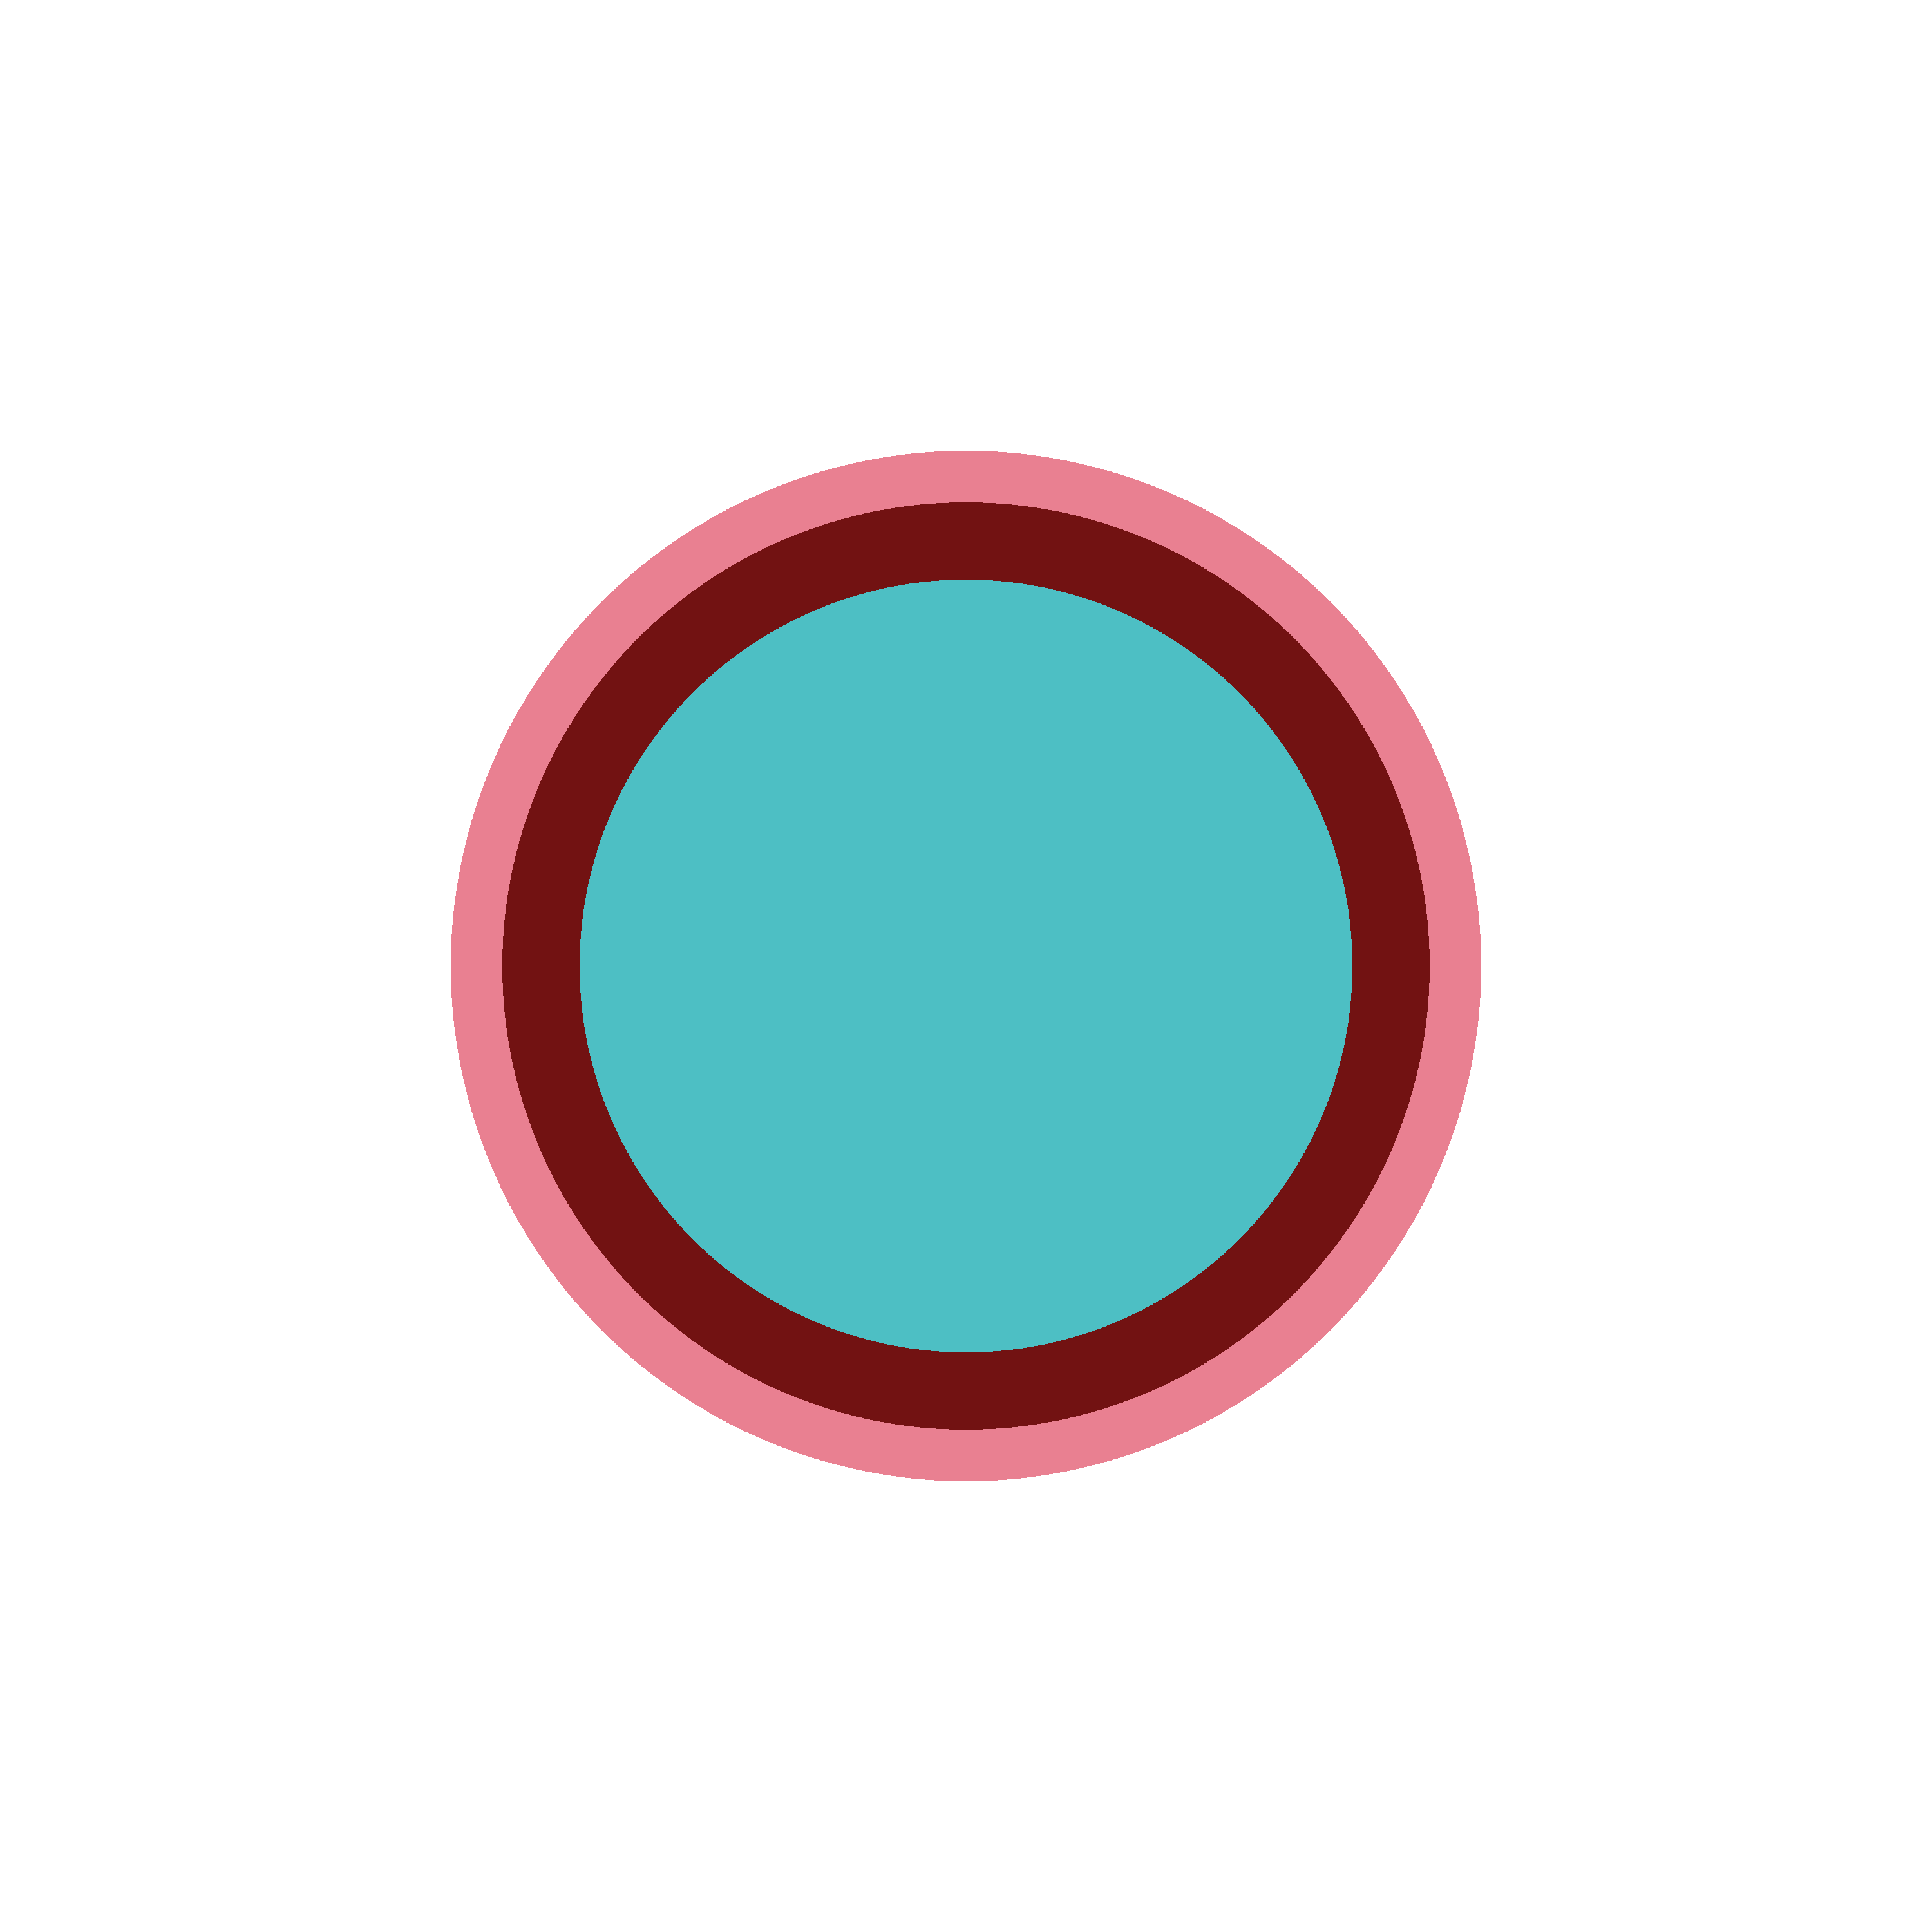

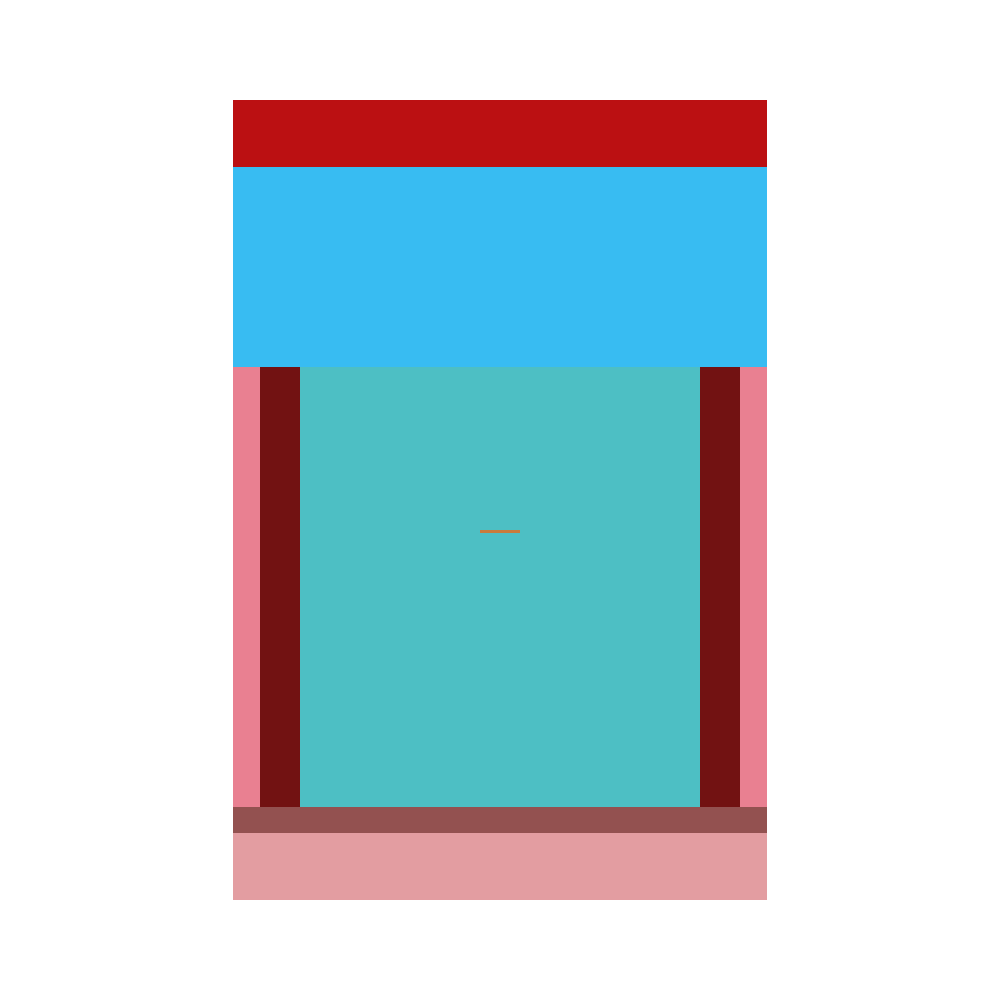

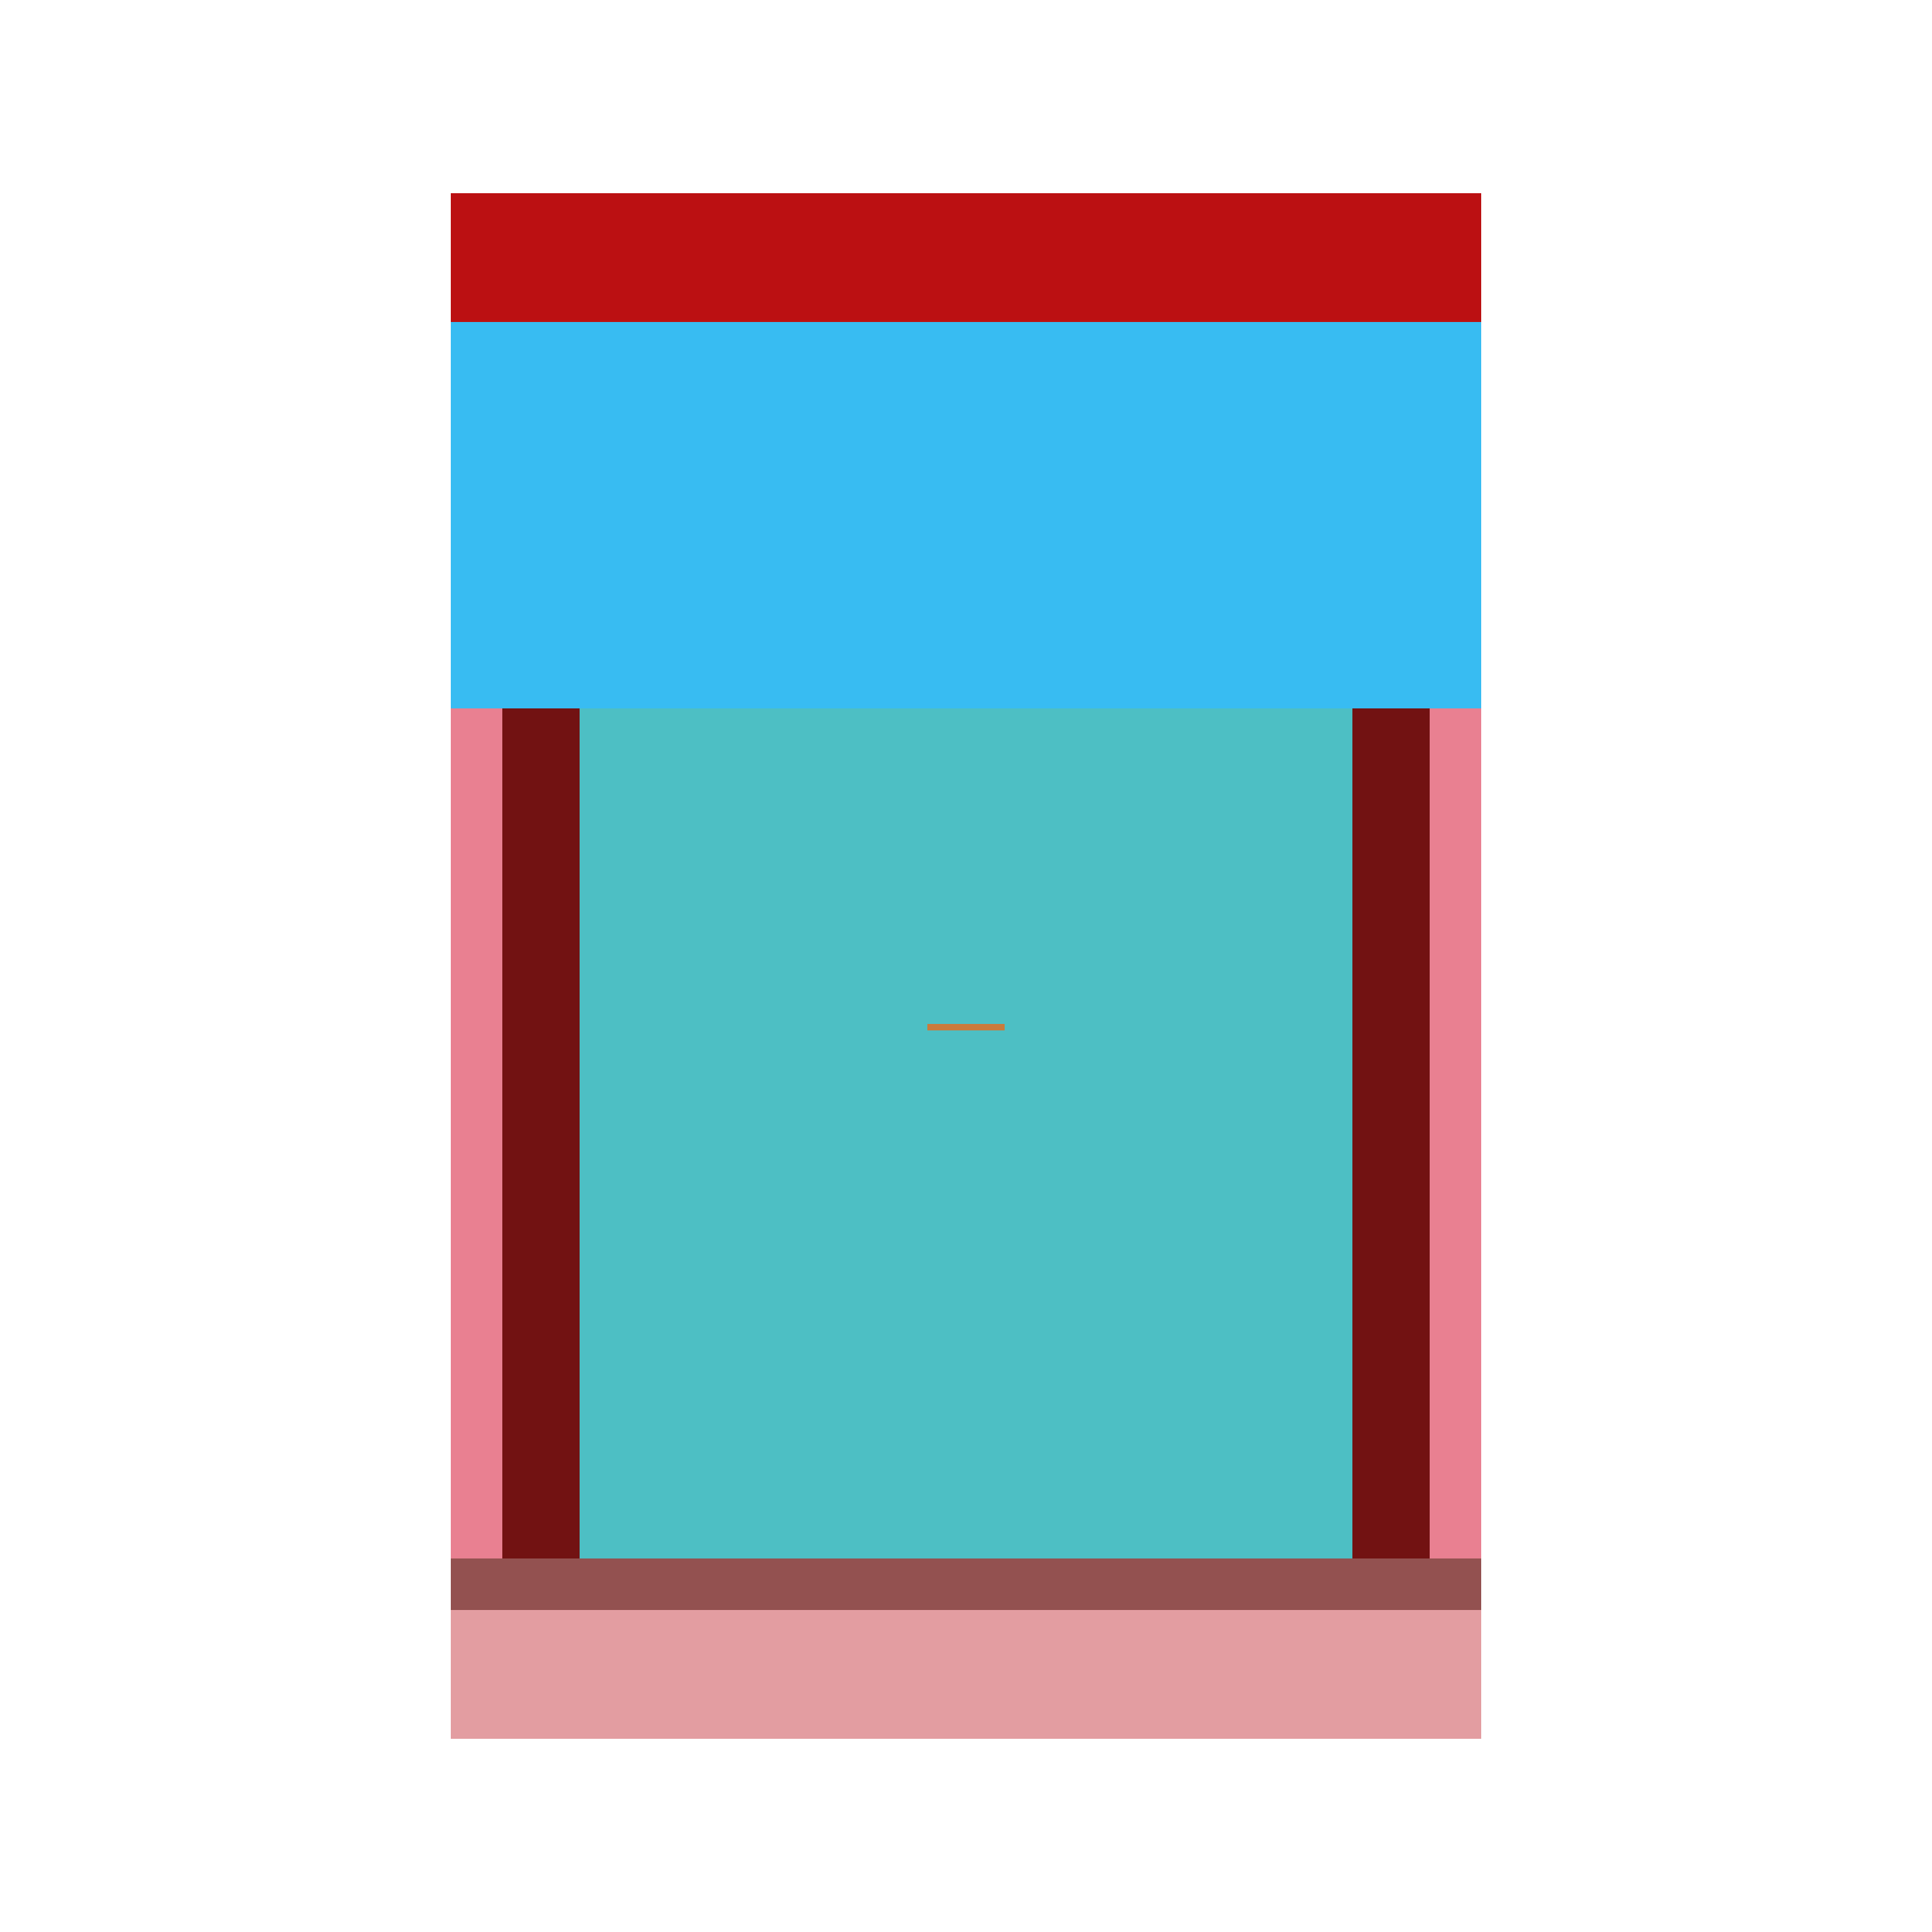

In [276]:
openmc.plot_inline(plot1)
openmc.plot_inline(plot2)
openmc.plot_inline(plot3)

#
#
#
#
#
#

# Analysis

In [294]:
# Load the statepoint file
sp = openmc.StatePoint('statepoint.100.h5')

tally = sp.get_tally(scores=['flux'],name = 'flux_xy')
tally.sum
(tally.mean, tally.std_dev)
flux_xy = tally.get_slice(scores=['flux'],filters = [openmc.ParticleFilter], filter_bins = [('neutron','photon')])
neutron_flux_xy = flux_xy.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('neutron',)], squeeze=True)
photon_flux_xy = flux_xy.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('photon',)], squeeze=True)





tally = sp.get_tally(scores=['flux'],name = 'flux_xy_Gd_detector')
tally.sum
(tally.mean, tally.std_dev)
flux_xy_Gd = tally.get_slice(scores=['flux'],filters = [openmc.ParticleFilter], filter_bins = [('neutron','photon')])
neutron_flux_xy_Gd = flux_xy_Gd.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('neutron',)], squeeze=True)
photon_flux_xy_Gd = flux_xy_Gd.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('photon',)], squeeze=True)

Get tally in xz direction

In [295]:
tally = sp.get_tally(scores=['flux'],name = 'flux_xz')

tally.sum
#print(tally.mean.shape)
(tally.mean, tally.std_dev)
flux_xz = tally.get_slice(scores=['flux'],filters = [openmc.ParticleFilter], filter_bins = [('neutron','photon')])
#fission = tally.get_slice(scores=['fission'])

neutron_flux_xz = flux_xz.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('neutron',)], squeeze=True)
photon_flux_xz = flux_xz.get_slice(filters = [openmc.ParticleFilter], filter_bins = [('photon',)], squeeze=True)

In [296]:
print(flux_xy)
print(photon_flux_xy)
print(neutron_flux_xy)

print(flux_xz)
print(photon_flux_xz)
print(neutron_flux_xz)
#neutron_flux.get_pandas_dataframe()

Tally
	ID             =	139
	Name           =	flux_xy
	Filters        =	MeshFilter, ParticleFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

Tally
	ID             =	141
	Name           =	flux_xy
	Filters        =	MeshFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

Tally
	ID             =	140
	Name           =	flux_xy
	Filters        =	MeshFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

Tally
	ID             =	145
	Name           =	flux_xz
	Filters        =	MeshFilter, ParticleFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

Tally
	ID             =	147
	Name           =	flux_xz
	Filters        =	MeshFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

Tally
	ID             =	146
	Name           =	flux_xz
	Filters        =	MeshFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Es

<Figure size 432x288 with 0 Axes>

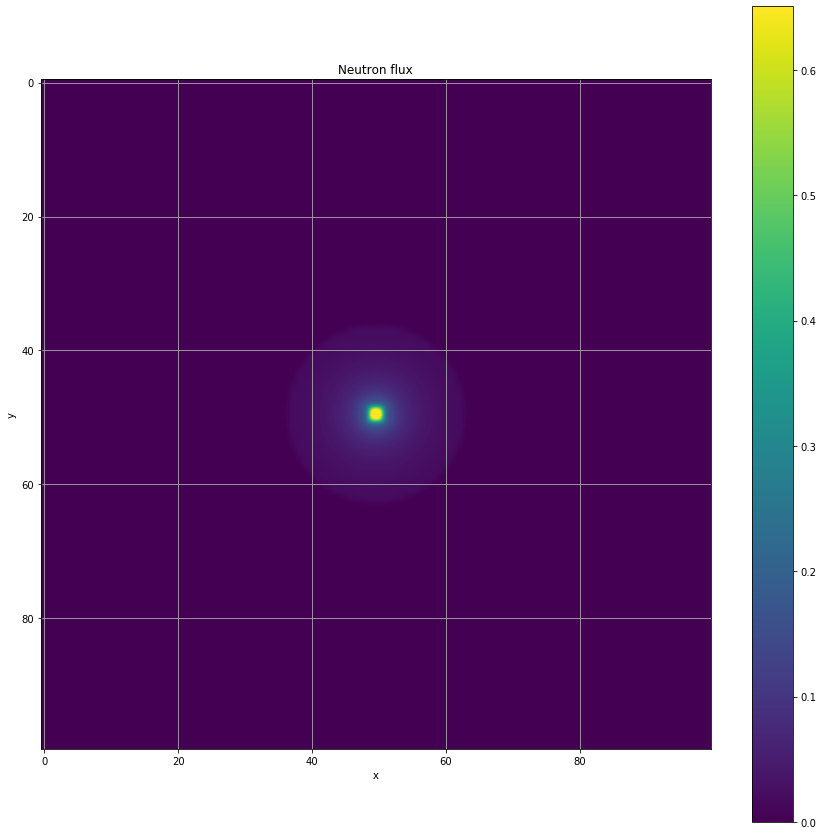

<Figure size 432x288 with 0 Axes>

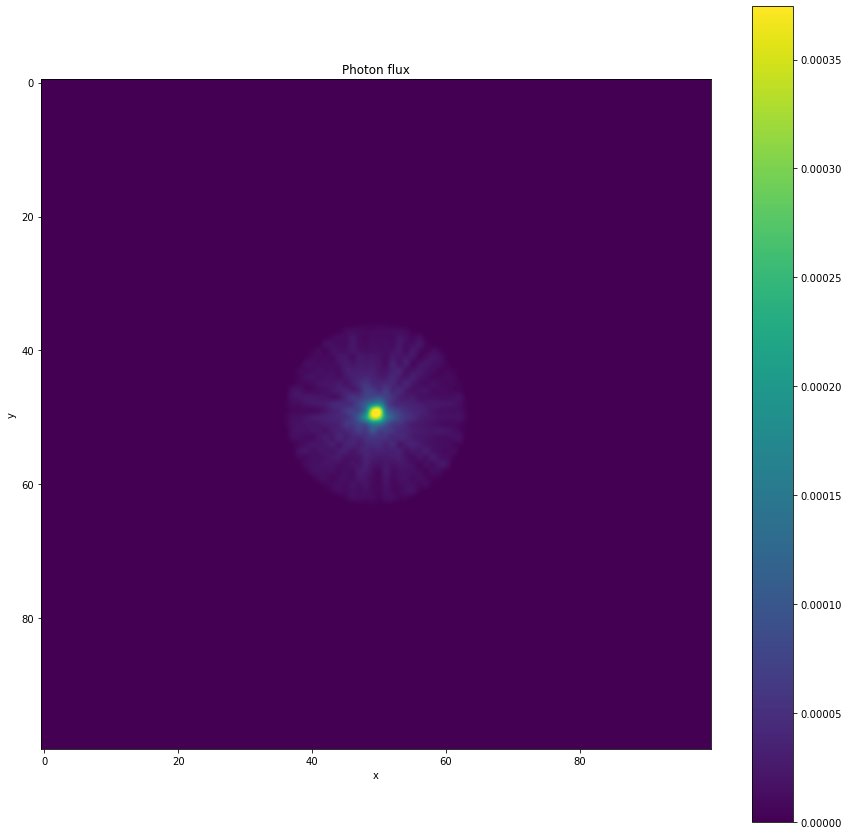

In [302]:
neutron_flux_xy.std_dev.shape = (100, 100)
neutron_flux_xy.mean.shape = (100, 100)


photon_flux_xy.std_dev.shape = (100, 100)
photon_flux_xy.mean.shape = (100, 100)
#fission.std_dev.shape = (200, 200)
#fission.mean.shape = (200, 200)

fig = plt.figure()
plt.figure(figsize=(15,15));
img = plt.imshow(neutron_flux_xy.mean,interpolation='spline16');
plt.title('Neutron flux');
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.colorbar( orientation='vertical')



#fig = plt.subplot(111)
#plt.figure(figsize=(10,10))
#fig.imshow(neutron_flux)
#fig2 = plt.subplot(122)
#plt.figure(figsize=(10,10))
#fig2.imshow(neutron_flux)


#fig = plt.subplot(111)
fig = plt.figure()
plt.figure(figsize=(15,15))
img = plt.imshow(photon_flux_xy.mean,interpolation='spline16')
plt.title('Photon flux');
plt.xlabel('x')
plt.ylabel('y')
plt.grid
plt.colorbar(orientation='vertical');
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal');
#fig2 = plt.subplot(122)
#fig2.imshow(photon_flux.mean)

<Figure size 432x288 with 0 Axes>

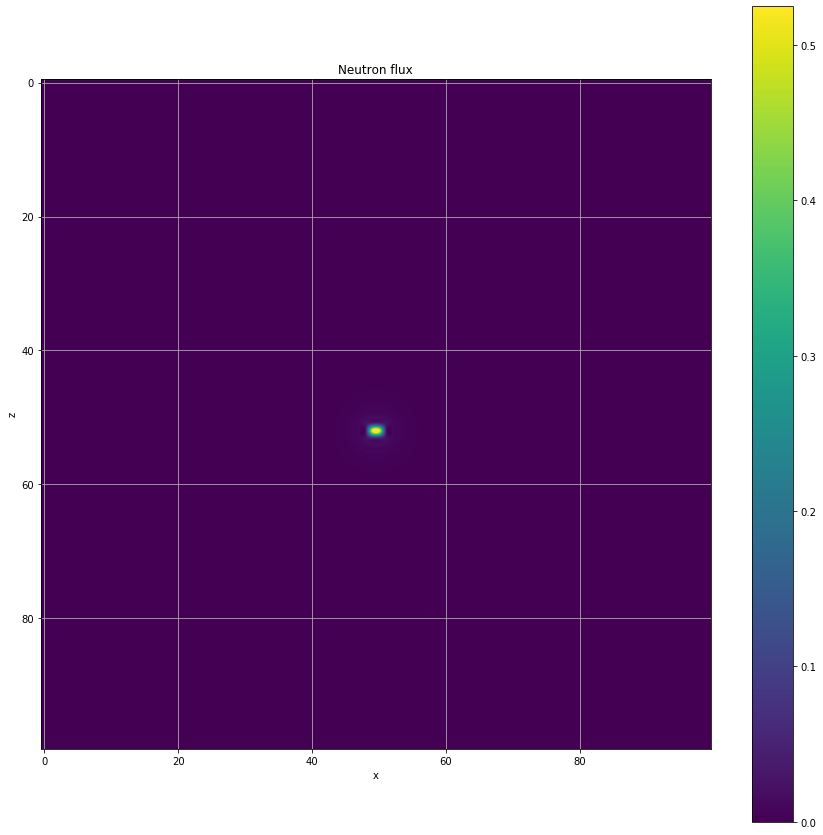

<Figure size 432x288 with 0 Axes>

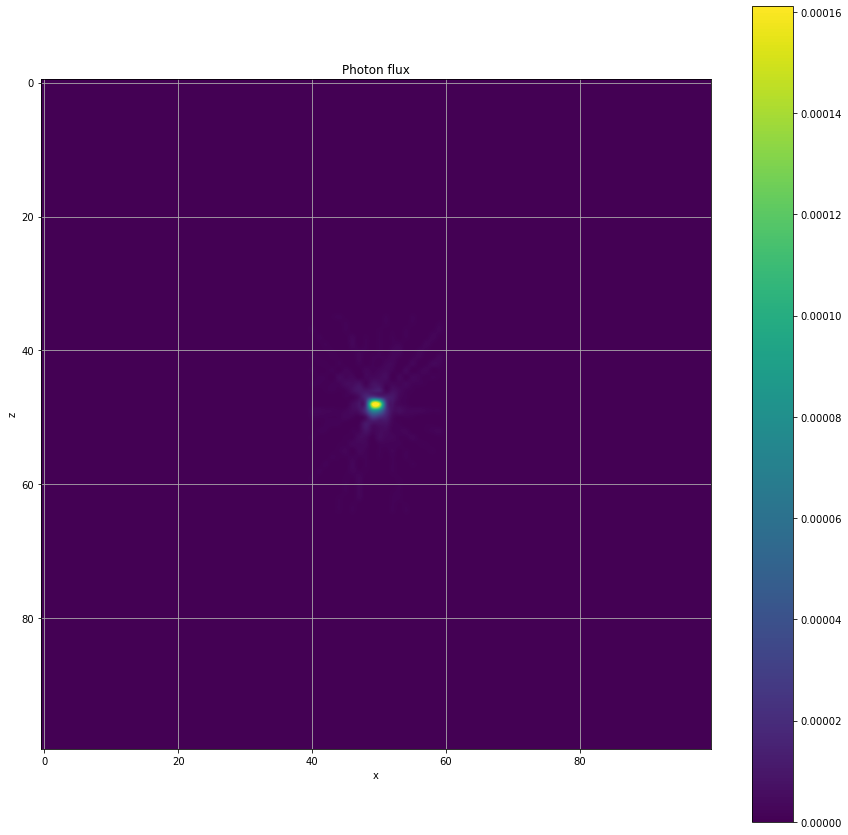

In [298]:
neutron_flux_xz.std_dev.shape = (100, 100)
neutron_flux_xz.mean.shape = (100, 100)


photon_flux_xz.std_dev.shape = (100, 100)
photon_flux_xz.mean.shape = (100, 100)
#fission.std_dev.shape = (200, 200)
#fission.mean.shape = (200, 200)

fig = plt.figure()
plt.figure(figsize=(15,15));
img = plt.imshow(neutron_flux_xz.mean,interpolation='spline16');
plt.title('Neutron flux');
plt.grid()
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar( orientation='vertical')


fig = plt.figure()
plt.figure(figsize=(15,15));
img = plt.imshow(photon_flux_xz.mean,interpolation='spline16');
plt.title('Photon flux');
plt.grid()
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar( orientation='vertical')

<Figure size 432x288 with 0 Axes>

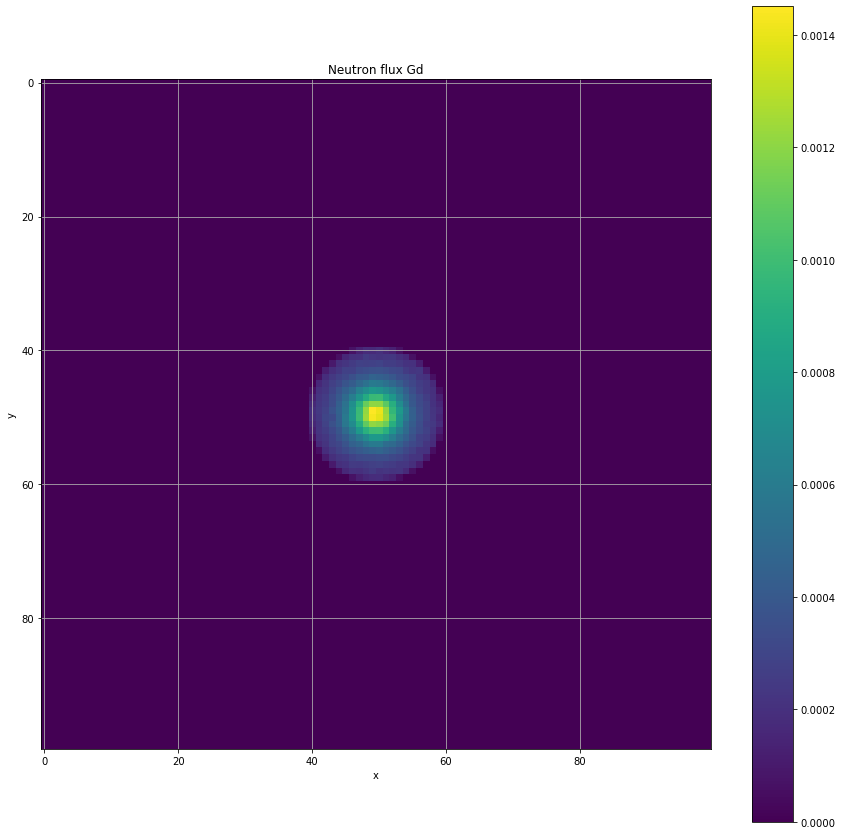

<Figure size 432x288 with 0 Axes>

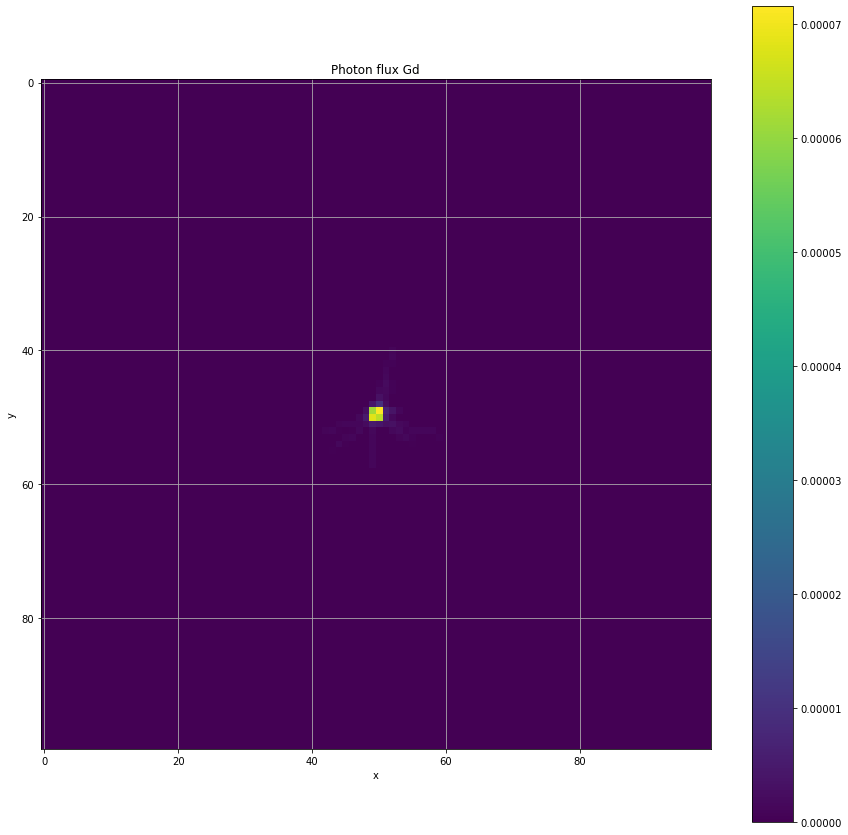

In [300]:
neutron_flux_xy_Gd 


neutron_flux_xy_Gd.std_dev.shape = (100, 100)
neutron_flux_xy_Gd.mean.shape = (100, 100)


photon_flux_xy_Gd.std_dev.shape = (100, 100)
photon_flux_xy_Gd.mean.shape = (100, 100)
#fission.std_dev.shape = (200, 200)
#fission.mean.shape = (200, 200)

fig = plt.figure()
plt.figure(figsize=(15,15));
img = plt.imshow(neutron_flux_xy_Gd.mean,interpolation='none');
plt.title('Neutron flux Gd');
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.colorbar( orientation='vertical')


fig = plt.figure()
plt.figure(figsize=(15,15));
img = plt.imshow(photon_flux_xy_Gd.mean,interpolation='none');
plt.title('Photon flux Gd');
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.colorbar( orientation='vertical')




In [286]:
# Extract mean and reshape as 2D NumPy arrays
#mean = fission.reshape((17,17))
mean = fission.mean.shape = (200, 200)
plt.imshow(mean, interpolation='nearest')
plt.title('fission rate')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()


NameError: name 'fission' is not defined

In [ ]:

# Determine relative error
relative_error = np.zeros_like(flux.std_dev)
nonzero = flux.mean > 0
relative_error[nonzero] = flux.std_dev[nonzero] / flux.mean[nonzero]

# distribution of relative errors
ret = plt.hist(relative_error[nonzero], bins=50)



sp.source


sp.source['E']


# Create log-spaced energy bins from 1 keV to 10 MeV
energy_bins = np.logspace(3,7)

# Calculate pdf for source energies
probability, bin_edges = np.histogram(sp.source['E'], energy_bins, density=True)

# Make sure integrating the PDF gives us unity
print(sum(probability*np.diff(energy_bins)))

# Plot source energy PDF
plt.semilogx(energy_bins[:-1], probability*np.diff(energy_bins), linestyle='steps')
plt.xlabel('Energy (eV)')
plt.ylabel('Probability/eV')


plt.quiver(sp.source['r']['x'], sp.source['r']['y'],
           sp.source['u']['x'], sp.source['u']['y'],
           np.log(sp.source['E']), cmap='jet', scale=20.0)
plt.colorbar()
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))

In [ ]:

fig, ax = plt.subplots()
#plt.figure(figsize=(15,7))
im = ax.imshow(flux.mean, interpolation='bilinear', cmap=plt.cm.hot,
               origin='lower', extent=[0, 100, 0, 100],
               vmax=abs(flux_xy.mean).max(), vmin=-abs(flux.mean).max())
fig.colorbar(im)
plt.title("Flux")
plt.show()

fig, ax = plt.subplots()
#plt.figure(figsize=(15,7))
im = ax.imshow(fission.mean, interpolation='bilinear',cmap=plt.cm.hot,
               origin='lower', extent=[0, 100, 0, 100],
               vmax=abs(fission.mean).max(), vmin=-abs(fission.mean).max())
fig.colorbar(im)
plt.title("Fission")
plt.show()






In [ ]:

# Determine relative error
relative_error = np.zeros_like(flux.std_dev)
nonzero = flux.mean > 0
relative_error[nonzero] = flux.std_dev[nonzero] / flux.mean[nonzero]

# distribution of relative errors
ret = plt.hist(relative_error[nonzero], bins=50)




In [ ]:


###############################################################
#
###############################################################
plt.figure()
plt.figure(figsize=(15,7))
sp.source
sp.source['E']

# Create log-spaced energy bins from 1 keV to 10 MeV
energy_bins = np.logspace(3,10)

# Calculate pdf for source energies
probability, bin_edges = np.histogram(sp.source['E'], energy_bins, density=True)

# Make sure integrating the PDF gives us unity
print(sum(probability*np.diff(energy_bins)))

# Plot source energy PDF
plt.loglog(energy_bins[:-1], probability*np.diff(energy_bins), linestyle='steps')
plt.xlabel('Energy (eV)')
plt.ylabel('Probability/eV')
plt.ylim(10**(-10),1)


plt.figure()
plt.figure(figsize=(15,7))
plt.quiver(sp.source['r']['x'], sp.source['r']['y'],
           sp.source['u']['x'], sp.source['u']['y'],
           np.log(sp.source['E']), cmap='jet', scale=20.0)
plt.colorbar()
#plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))



